<a href="https://colab.research.google.com/github/Ghufrnainun/2025_ComputerVision_TI2C/blob/main/Jobsheet_2_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum 01. Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


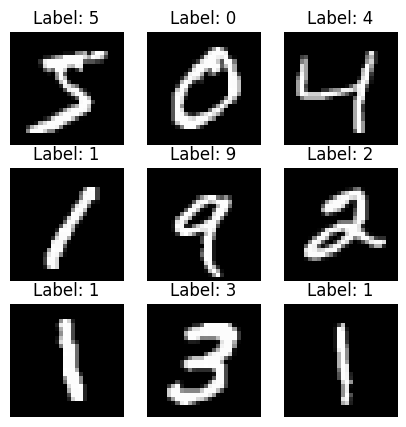

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range (9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Tugas Kecil

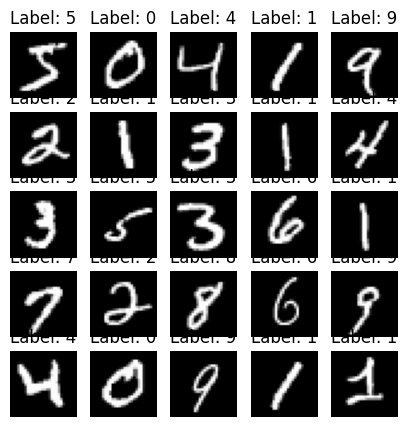

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## Praktikum 02. Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) /255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi :", accuracy_score(y_test,y_pred))

Akurasi : 0.9101


Tugas Kecil

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) /255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi :", accuracy_score(y_test,y_pred))

Akurasi : 0.9513


## Praktikum 03. Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8905 - loss: 0.3764 - val_accuracy: 0.9825 - val_loss: 0.0655
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9807 - loss: 0.0647 - val_accuracy: 0.9857 - val_loss: 0.0545
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9877 - loss: 0.0411 - val_accuracy: 0.9845 - val_loss: 0.0568
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9908 - loss: 0.0297 - val_accuracy: 0.9843 - val_loss: 0.0637
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9942 - loss: 0.0203 - val_accuracy: 0.9877 - val_loss: 0.0498


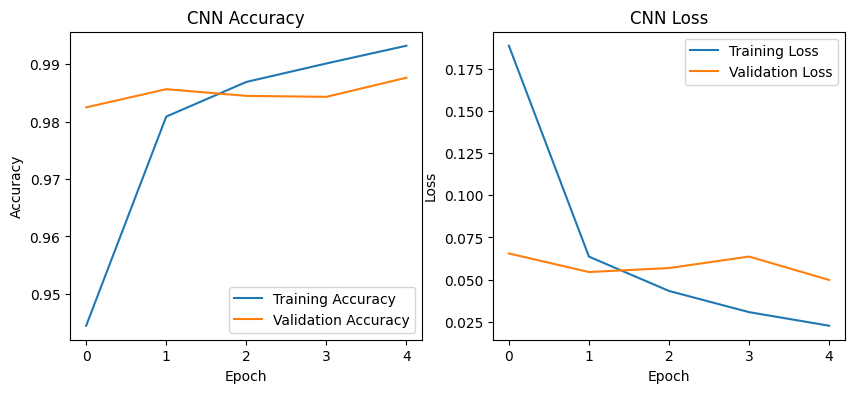

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Tugas Kecil

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8820 - loss: 0.3854 - val_accuracy: 0.9793 - val_loss: 0.0680
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9819 - loss: 0.0571 - val_accuracy: 0.9872 - val_loss: 0.0466
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9877 - loss: 0.0400 - val_accuracy: 0.9893 - val_loss: 0.0390
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9873 - val_loss: 0.0428
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9938 - loss: 0.0199 - val_accuracy: 0.9893 - val_loss: 0.0398


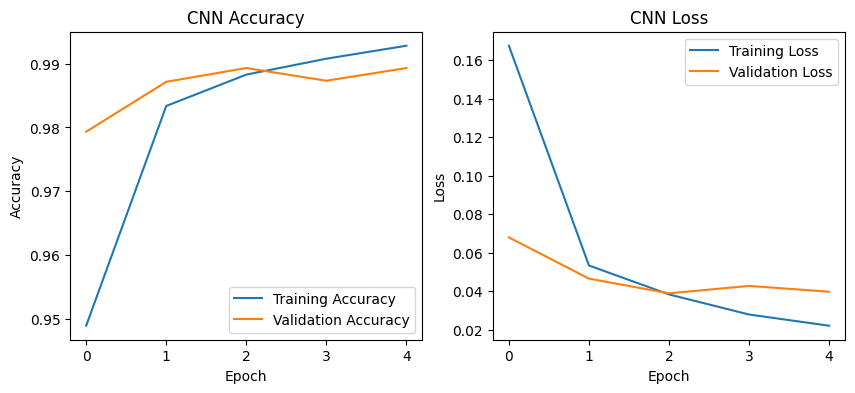

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Praktikum 04. Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.3707 - loss: 1.7204 - val_accuracy: 0.5674 - val_loss: 1.2258
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.5860 - loss: 1.1795 - val_accuracy: 0.6346 - val_loss: 1.0606
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.6472 - loss: 1.0175 - val_accuracy: 0.6552 - val_loss: 0.9885
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.6810 - loss: 0.9201 - val_accuracy: 0.6568 - val_loss: 0.9732
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7030 - loss: 0.8496 - val_accuracy: 0.6676 - val_loss: 0.9789
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.7214 - loss: 0.8016 - val_accuracy: 0.6904 - val_loss: 0.8962
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7421 - loss: 0.7370 - val_accuracy: 0.6992 - val_loss: 0.8811
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.7546 -

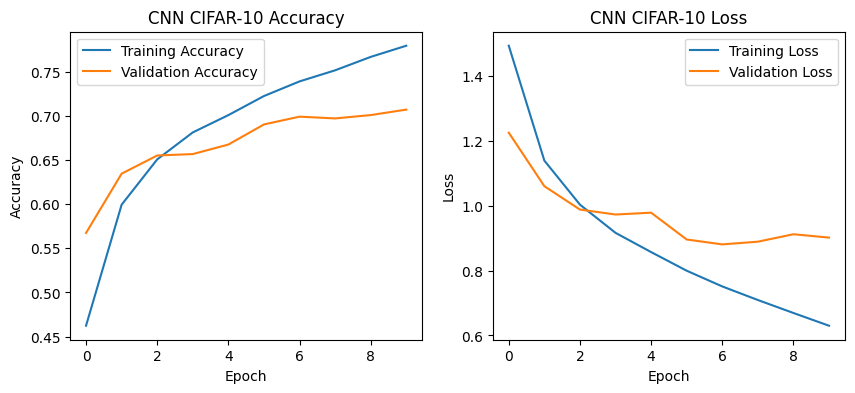

In [7]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test,y_test)  = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas Kecil

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.2723 - loss: 1.9488 - val_accuracy: 0.4862 - val_loss: 1.4561
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.4488 - loss: 1.5110 - val_accuracy: 0.5782 - val_loss: 1.2162
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.4969 - loss: 1.3924 - val_accuracy: 0.6252 - val_loss: 1.1036
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.5292 - loss: 1.3090 - val_accuracy: 0.6366 - val_loss: 1.0521
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.5530 - loss: 1.2401 - val_accuracy: 0.6504 - val_loss: 1.0145
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.5844 - loss: 1.1726 - val_accuracy: 0.6516 - val_loss: 0.9944
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.5995 - loss: 1.1321 - val_accuracy: 0.6754 - val_loss: 0.9500
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6135 -

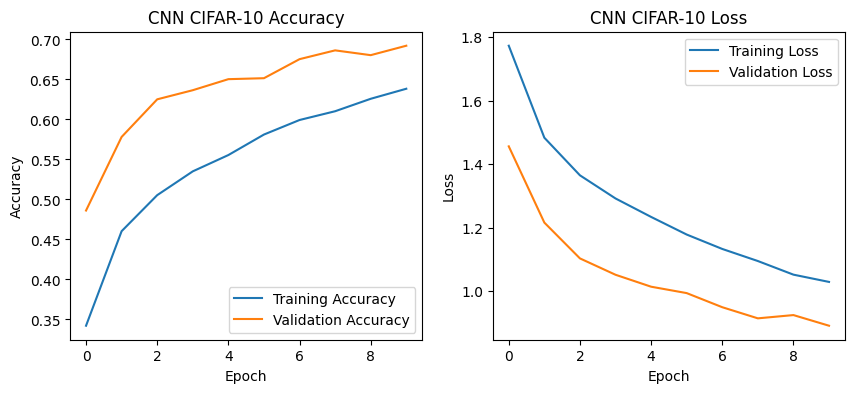

In [8]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test,y_test)  = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum 05. Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 384s 273ms/step - accuracy: 0.4477 - loss: 1.5717 - val_accuracy: 0.5772 - val_loss: 1.2182
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 440s 271ms/step - accuracy: 0.5816 - loss: 1.2002 - val_accuracy: 0.5984 - val_loss: 1.1527
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 377s 268ms/step - accuracy: 0.6054 - loss: 1.1292 - val_accuracy: 0.6034 - val_loss: 1.1384
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 385s 271ms/step - accuracy: 0.6210 - loss: 1.0873 - val_accuracy: 0.5966 - val_loss: 1.1378
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 378s 268ms/step - accuracy: 0.6295 - loss: 1.0607 - val_accuracy: 0.6122 - val_loss: 1.1179


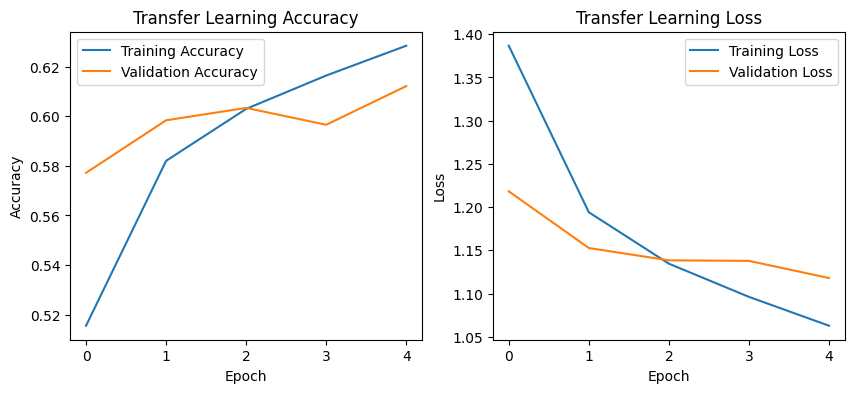

In [9]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential ([
    base_model, layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

tugas Kecil

In [10]:
# Unfreeze beberapa layer terakhir VGG16
base_model.trainable = True

# Cuma buka 2 layer terakhir aja (biar ga berat & ga overfit)
for layer in base_model.layers[:-2]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # lr lebih kecil pas fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1
)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 412s 292ms/step - accuracy: 0.3356 - loss: 1.9323 - val_accuracy: 0.5662 - val_loss: 1.2904
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 445s 294ms/step - accuracy: 0.5754 - loss: 1.2608 - val_accuracy: 0.5992 - val_loss: 1.1624
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 438s 292ms/step - accuracy: 0.6118 - loss: 1.1458 - val_accuracy: 0.6256 - val_loss: 1.1032
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 441s 291ms/step - accuracy: 0.6343 - loss: 1.0819 - val_accuracy: 0.6358 - val_loss: 1.0640
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 410s 292ms/step - accuracy: 0.6441 - loss: 1.0433 - val_accuracy: 0.6414 - val_loss: 1.0432


## Praktikum 06. Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 240ms/step
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1000
           1       0.64      0.78      0.71      1000
           2       0.64      0.42      0.51      1000
           3       0.44      0.55      0.49      1000
           4       0.61      0.50      0.55      1000
           5       0.57      0.52      0.55      1000
           6       0.66      0.69      0.68      1000
           7       0.62      0.75      0.68      1000
           8       0.76      0.72      0.74      1000
           9       0.74      0.59      0.66      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



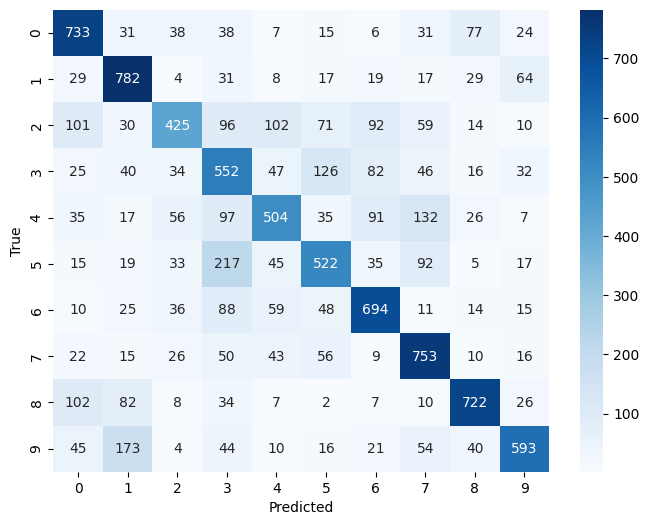

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()